In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import geopandas as gpd
import contextily as ctx
import geopandas.tools
import pygeos
from shapely.geometry import Point

from descartes import PolygonPatch
from geopandas import GeoDataFrame as gdf

### ARCHIVO AGEBS

Descargamos los datos con información de las agebs de la Ciudad de México. Unidades más pequeñas que las alcaldias y localidades. Fuente:INEGI https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=889463807469

In [2]:
agebs = gpd.read_file("../data/shapefiles_agebs/09a.shp")

Checamos la base de datos

In [3]:
agebs.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,0901000011716,09,010,0001,1716,"POLYGON ((2787237.541 816989.461, 2787288.728 ..."
1,0901000012150,09,010,0001,2150,"POLYGON ((2794154.458 823013.444, 2794155.774 ..."
2,0901000011133,09,010,0001,1133,"POLYGON ((2795690.723 820050.788, 2795684.238 ..."
3,0901000011307,09,010,0001,1307,"POLYGON ((2792584.475 815678.668, 2792624.325 ..."
4,0901000010281,09,010,0001,0281,"POLYGON ((2788845.392 823526.074, 2788840.549 ..."


### BASE ROBO DE VEHÍCULOS 2020

Descargamos los datos con robo de vehículos en 2020. Esta base fue filtrada previamente, contenía todo tipo de delitos desde 2016. Fuente: Portal de datos abiertos CDMX https://datos.cdmx.gob.mx/

In [4]:
robos = pd.read_csv('../data/Robo_vehiculo_2020.csv',encoding='latin-1')

Checamos las base de datos

In [5]:
robos.head()

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2020,Enero,2020-01-01 01:00:00,2020,Enero,2020-01-01 03:03:43,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,FISCALÖA DE INVESTIGACIàN TERRITORIAL EN AZCAP...,AZ-4,UI-2SD,ROBO DE VEHÖCULO CON Y SIN VIOLENCIA,PONIENTE NUMERO 25 A,NaN,DEL GAS,AZCAPOTZALCO,NaN,-99.154355,19.470282,NaN
1,2020,Enero,2020-01-01 06:00:00,2020,Enero,2020-01-01 11:23:33,ROBO DE VEHICULO DE SERVICIO PéBLICO CON VIOLE...,FISCALÖA DE INVESTIGACIàN TERRITORIAL EN CUAUH...,CUH-7,UI-3SD,ROBO DE VEHÖCULO CON Y SIN VIOLENCIA,"EJE 3 (HECHOS EN EL ESTADO DE MEXICO, COACALCO)",AVENIDA PRESIDENTES (HECHOS EN EL ESTADO DE ME...,NaN,COACALCO DE BERRIOZABAL,NaN,NaN,NaN,NaN
2,2020,Enero,2020-01-01 16:00:00,2020,Enero,2020-01-01 19:09:19,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,FISCALÖA DE INVESTIGACIàN TERRITORIAL EN TLALPAN,TLP-3,UI-3CD,ROBO DE VEHÖCULO CON Y SIN VIOLENCIA,PERIFERICO,NaN,PISTA OLIMPICA VIRGILIO URIBE (CANAL DE CUEMANCO),XOCHIMILCO,NaN,-99.101847,19.292659,NaN
3,2020,Enero,2020-01-01 04:15:00,2020,Enero,2020-01-01 19:49:43,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,FISCALÖA DE INVESTIGACIàN TERRITORIAL EN XOCHI...,XO-2,UI-1SD,ROBO DE VEHÖCULO CON Y SIN VIOLENCIA,PLAN DE DE OROSQUITA,NaN,SAN LORENZO LA CEBADA,XOCHIMILCO,NaN,-99.123197,19.280922,NaN
4,2020,Enero,2020-01-01 20:00:00,2020,Enero,2020-01-01 21:43:16,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,FISCALÖA DE INVESTIGACIàN TERRITORIAL EN MAGDA...,MC-1,UI-3CD,ROBO DE VEHÖCULO CON Y SIN VIOLENCIA,CORONA DEL ROSAL,NaN,SAN BARTOLO AMEYALCO,LA MAGDALENA CONTRERAS,NaN,-99.245554,19.327023,NaN


Eliminamos las filas que no contengan información numérica de la columna "latitude"

In [6]:
robos = robos[pd.to_numeric(robos['latitud'], errors='coerce').notnull()]

Eliminamos las filas que no contengan información numérica de la columna "longitud"

In [7]:
robos = robos[pd.to_numeric(robos['longitud'], errors='coerce').notnull()]

Preparamos la base para la ubicación de los puntos donde ocurrieron los robos de vehiculos con información de las columnas "latitud" y "longitud".

In [8]:
points= gdf(robos, geometry=gpd.points_from_xy(robos.longitud, robos.latitud))

Presentamos la visualización de la base, una vez acondicionada para ubicar los puntos. La información se encuentra contenida en la columna "geometry".

In [9]:
points[:3]

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo,geometry
0,2020,Enero,2020-01-01 01:00:00,2020,Enero,2020-01-01 03:03:43,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,FISCALÖA DE INVESTIGACIàN TERRITORIAL EN AZCAP...,AZ-4,UI-2SD,ROBO DE VEHÖCULO CON Y SIN VIOLENCIA,PONIENTE NUMERO 25 A,NaN,DEL GAS,AZCAPOTZALCO,NaN,-99.154355,19.470282,NaN,POINT (-99.15435 19.47028)
2,2020,Enero,2020-01-01 16:00:00,2020,Enero,2020-01-01 19:09:19,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,FISCALÖA DE INVESTIGACIàN TERRITORIAL EN TLALPAN,TLP-3,UI-3CD,ROBO DE VEHÖCULO CON Y SIN VIOLENCIA,PERIFERICO,NaN,PISTA OLIMPICA VIRGILIO URIBE (CANAL DE CUEMANCO),XOCHIMILCO,NaN,-99.101847,19.292659,NaN,POINT (-99.10185 19.29266)
3,2020,Enero,2020-01-01 04:15:00,2020,Enero,2020-01-01 19:49:43,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,FISCALÖA DE INVESTIGACIàN TERRITORIAL EN XOCHI...,XO-2,UI-1SD,ROBO DE VEHÖCULO CON Y SIN VIOLENCIA,PLAN DE DE OROSQUITA,NaN,SAN LORENZO LA CEBADA,XOCHIMILCO,NaN,-99.123197,19.280922,NaN,POINT (-99.12320 19.28092)


### MAPA ROBO DE VEHÍCULOS POR AGEB

Se transforman los datos a crs para tener una base para el mapa

In [10]:
agebs = agebs.to_crs(epsg=3857)

In [11]:
points.crs = "EPSG:4326"
points = points.to_crs(epsg=3857)

Visualicemos nuestro mapa

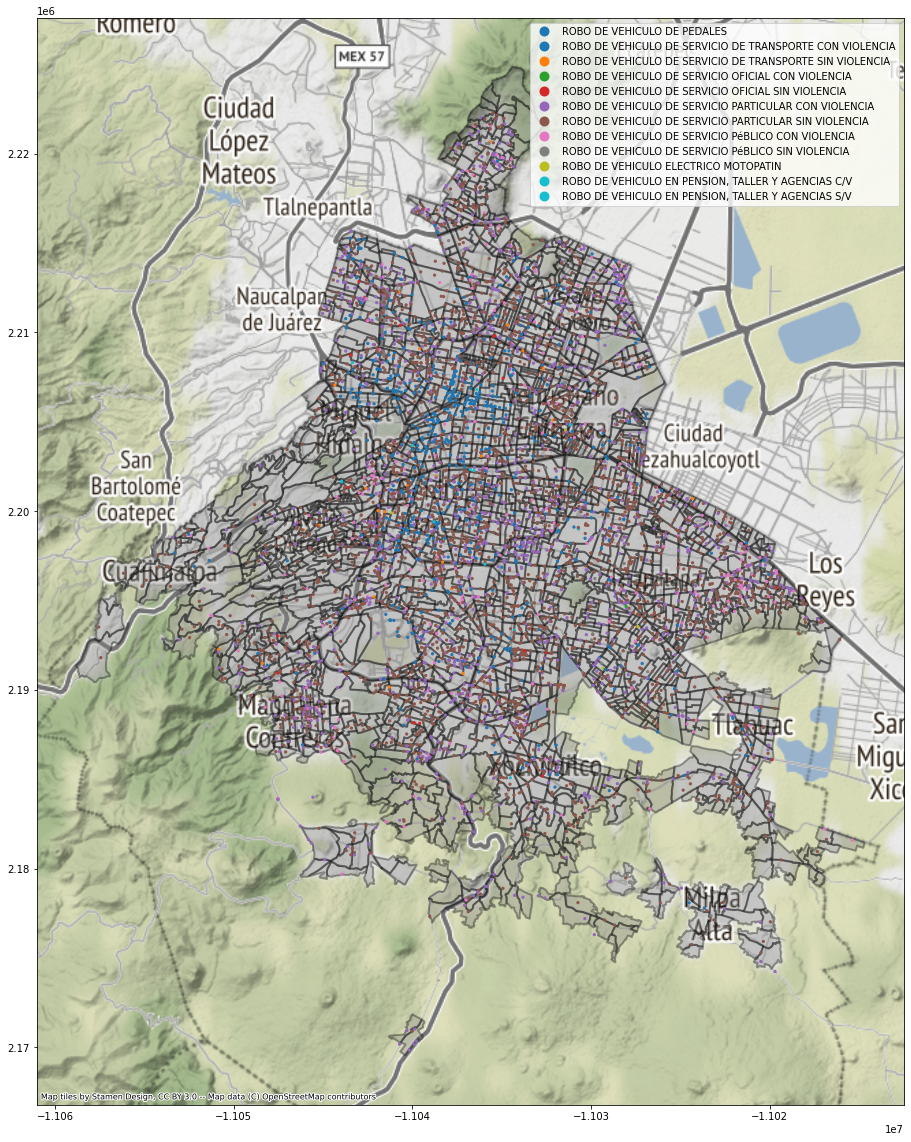

In [18]:
ax = agebs.plot(figsize=(20, 20), alpha=0.35, edgecolor='black',color='gray', linewidth=2)
points.plot(ax=ax, markersize=5, marker="o", column='delito',legend=True)
ctx.add_basemap(ax)

### CORRESPONDENCIA DE CADA PUNTO CON SU AGEB

Realizamos el join entre agebs y puntos

In [12]:
result = gpd.tools.sjoin(points, agebs, how="left")

In [13]:
print(result.head())

   ao_hechos mes_hechos         fecha_hechos  ao_inicio mes_inicio  \
0       2020      Enero  2020-01-01 01:00:00       2020      Enero   
2       2020      Enero  2020-01-01 16:00:00       2020      Enero   
3       2020      Enero  2020-01-01 04:15:00       2020      Enero   
4       2020      Enero  2020-01-01 20:00:00       2020      Enero   
5       2020      Enero  2020-01-01 08:30:00       2020      Enero   

          fecha_inicio                                             delito  \
0  2020-01-01 03:03:43  ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...   
2  2020-01-01 19:09:19  ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...   
3  2020-01-01 19:49:43  ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...   
4  2020-01-01 21:43:16  ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...   
5  2020-01-02 07:51:32  ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...   

                                            fiscalia agencia  \
0  FISCALÖA DE INVESTIGACIàN TERRITORIAL EN AZCAP...

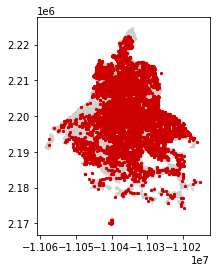

In [14]:
fig, ax = plt.subplots(1)
agebs.plot(ax=ax, color="#cccccc")
points.plot(ax=ax, markersize=5, color="#cc0000")
plt.show()

### BASE CENSO 2020

Descargamos base con información por ageb del censo 2020 ya habiendo filtrado por total de información por ageb https://www.inegi.org.mx/programas/ccpv/2020/default.html#Microdatos

In [15]:
censo = pd.read_csv('../data/censo_2020.csv',encoding='latin-1')

In [16]:
censo.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,10,0,3183,1695,...,741,772,692,313,221,145,8,14,148,5
1,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,25,0,5593,2915,...,1373,1510,1203,478,349,238,28,68,393,14
2,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,003A,0,4235,2232,...,965,1049,878,361,339,247,5,12,250,*
3,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,44,0,4768,2551,...,1124,1237,1076,481,452,294,10,17,254,*
4,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,97,0,2176,1115,...,517,562,507,276,260,153,4,3,70,0


### UNIÓN BASE DE SHAPEFILES CON INFORMACIÓN DEL CENSO 2020

Creamos clave unica en base de censo para realizar el merge con base de agebs

In [17]:
censo.ENTIDAD.unique()

array([9])

In [18]:
censo['CVE_ENT'] = censo['ENTIDAD'].astype(str)
censo['CVE_ENT'] = censo['CVE_ENT'].str.rjust(2,'0')
censo.CVE_ENT.unique()

array(['09'], dtype=object)

In [19]:
censo.MUN.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [20]:
censo['CVE_MUN'] = censo['MUN'].astype(str)
censo['CVE_MUN'] = censo['CVE_MUN'].str.rjust(2,'0')
censo['CVE_MUN'] = censo['CVE_MUN'].str.rjust(3,'0')
censo.CVE_MUN.unique()

array(['002', '003', '004', '005', '006', '007', '008', '009', '010',
       '011', '012', '013', '014', '015', '016', '017'], dtype=object)

In [21]:
censo.LOC.unique()

array([  1,  20,  11,  15,  17,  24,  29,  33,  36, 152, 300,  21,  26,
       110,  19,  27, 135])

In [22]:
agebs.CVE_LOC.unique()

array(['0001', '0027', '0026', '0019', '0021', '0011', '0024', '0020',
       '0300', '0033', '0036', '0029', '0152', '0017', '0015'],
      dtype=object)

In [23]:
##Faltan localidades 110 y 135 en base agebs

In [24]:
censo['CVE_LOC'] = censo['LOC'].astype(str)
censo['CVE_LOC'] = censo['CVE_LOC'].str.rjust(4,'0')
censo.CVE_LOC.unique()

array(['0001', '0020', '0011', '0015', '0017', '0024', '0029', '0033',
       '0036', '0152', '0300', '0021', '0026', '0110', '0019', '0027',
       '0135'], dtype=object)

In [25]:
censo.AGEB.unique()

array(['10', '25', '003A', ..., '1505', '151A', '1524'], dtype=object)

In [26]:
censo['CVE_AGEB'] = censo['AGEB'].astype(str)
censo['CVE_AGEB'] = censo['CVE_AGEB'].str.rjust(3,'0')
censo['CVE_AGEB'] = censo['CVE_AGEB'].str.rjust(4,'0')
censo.CVE_AGEB.unique()

array(['0010', '0025', '003A', ..., '1505', '151A', '1524'], dtype=object)

Creamos clave única en base de censo 2020

In [27]:
censo['CVEGEO'] = censo['CVE_ENT'] + censo['CVE_MUN'] + censo['CVE_LOC']+ censo['CVE_AGEB']
censo[:25]

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVEGEO
0,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,10,0,3183,1695,...,145,8,14,148,5,09,002,0001,0010,0900200010010
1,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,25,0,5593,2915,...,238,28,68,393,14,09,002,0001,0025,0900200010025
2,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,003A,0,4235,2232,...,247,5,12,250,*,09,002,0001,003A,090020001003A
3,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,44,0,4768,2551,...,294,10,17,254,*,09,002,0001,0044,0900200010044
4,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,97,0,2176,1115,...,153,4,3,70,0,09,002,0001,0097,0900200010097
5,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,010A,0,3346,1866,...,213,*,4,112,0,09,002,0001,010A,090020001010A
6,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,114,0,9866,5107,...,630,63,82,618,6,09,002,0001,0114,0900200010114
7,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,129,0,5703,2968,...,506,24,27,221,4,09,002,0001,0129,0900200010129
8,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,133,0,7288,3796,...,357,25,52,432,5,09,002,0001,0133,0900200010133
9,9,Ciudad de Mxico,2,Azcapotzalco,1,Total AGEB urbana,148,0,2513,1282,...,184,3,4,90,0,09,002,0001,0148,0900200010148


Unimos shapefile de agebs con información censo 2020

In [28]:
ageb_censo = pd.merge(agebs, censo, on="CVEGEO")
ageb_censo[:10]

,CVEGEO,CVE_ENT_x,CVE_MUN_x,CVE_LOC_x,CVE_AGEB_x,geometry,ENTIDAD,NOM_ENT,MUN,NOM_MUN,...,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,CVE_ENT_y,CVE_MUN_y,CVE_LOC_y,CVE_AGEB_y
0,0901000011716,09,010,0001,1716,"POLYGON ((-11049441.690 2193305.315, -11049387...",9,Ciudad de Mxico,10,µlvaro Obreg¢n,...,279,210,45,82,601,9,09,010,0001,1716
1,0901000012150,09,010,0001,2150,"POLYGON ((-11041970.075 2199599.916, -11041968...",9,Ciudad de Mxico,10,µlvaro Obreg¢n,...,695,450,21,24,261,*,09,010,0001,2150
2,0901000011133,09,010,0001,1133,"POLYGON ((-11040399.758 2196401.305, -11040406...",9,Ciudad de Mxico,10,µlvaro Obreg¢n,...,545,212,19,*,23,0,09,010,0001,1133
3,0901000011307,09,010,0001,1307,"POLYGON ((-11043789.910 2191794.639, -11043748...",9,Ciudad de Mxico,10,µlvaro Obreg¢n,...,640,348,*,0,18,0,09,010,0001,1307
4,0901000010281,09,010,0001,0281,"POLYGON ((-11047600.503 2200257.994, -11047605...",9,Ciudad de Mxico,10,µlvaro Obreg¢n,...,48,30,0,0,0,0,09,010,0001,0281
5,0901000012199,09,010,0001,2199,"POLYGON ((-11044816.080 2196401.042, -11044929...",9,Ciudad de Mxico,10,µlvaro Obreg¢n,...,381,210,11,35,243,*,09,010,0001,2199
6,0901000012269,09,010,0001,2269,"POLYGON ((-11043350.215 2198514.440, -11043361...",9,Ciudad de Mxico,10,µlvaro Obreg¢n,...,305,181,9,11,94,3,09,010,0001,2269
7,0901000012273,09,010,0001,2273,"POLYGON ((-11046546.751 2196274.816, -11046513...",9,Ciudad de Mxico,10,µlvaro Obreg¢n,...,8,9,*,0,*,0,09,010,0001,2273
8,0901000011330,09,010,0001,1330,"POLYGON ((-11048793.022 2194668.618, -11048771...",9,Ciudad de Mxico,10,µlvaro Obreg¢n,...,715,485,30,74,488,14,09,010,0001,1330
9,090100001181A,09,010,0001,181A,"POLYGON ((-11045090.863 2196276.821, -11045263...",9,Ciudad de Mxico,10,µlvaro Obreg¢n,...,577,344,27,92,351,15,09,010,0001,181A


### ANÁLISIS DESCRIPTIVO

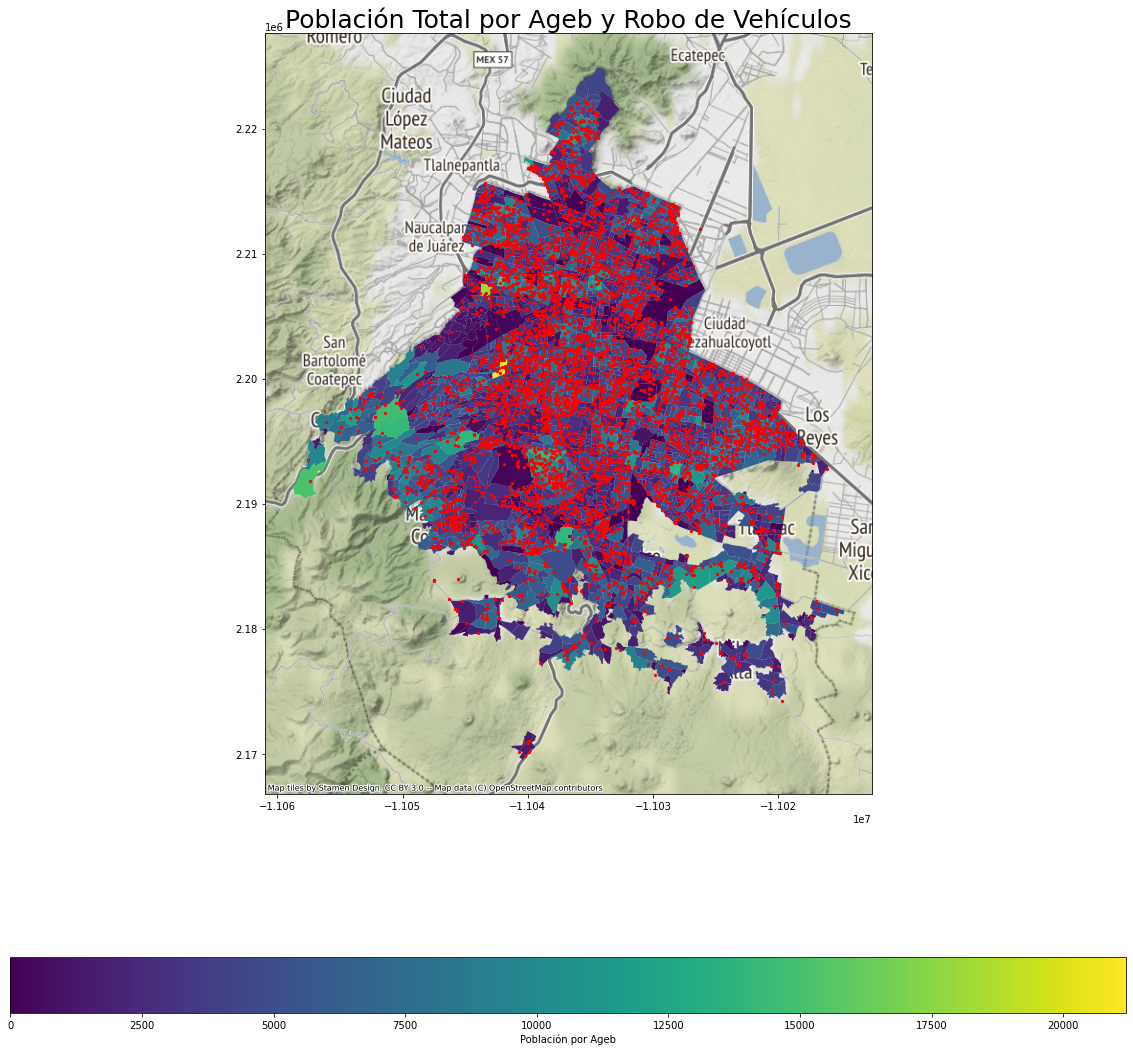

In [29]:
ageb_censo = ageb_censo.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax= ageb_censo.plot(column='POBTOT',ax=ax, legend=True,legend_kwds={'label': "Población por Ageb",'orientation': "horizontal"})
points.plot(ax=ax, markersize=5, marker="o",color='red')
ax.set_title("Población Total por Ageb y Robo de Vehículos", fontsize=25)
ctx.add_basemap(ax)